# Lab Work - Daniel Coelho - PID:6194506

In [ ]:
# API KEY: a1a945464e0c19fb56c6f2a50998ecd321a9df9dcf783e5fb5778002f131832f159fd0ca14e46790e9c761ecbfadccd69d6cc6cdcf9ecaf9231fd2cfc105d7ec

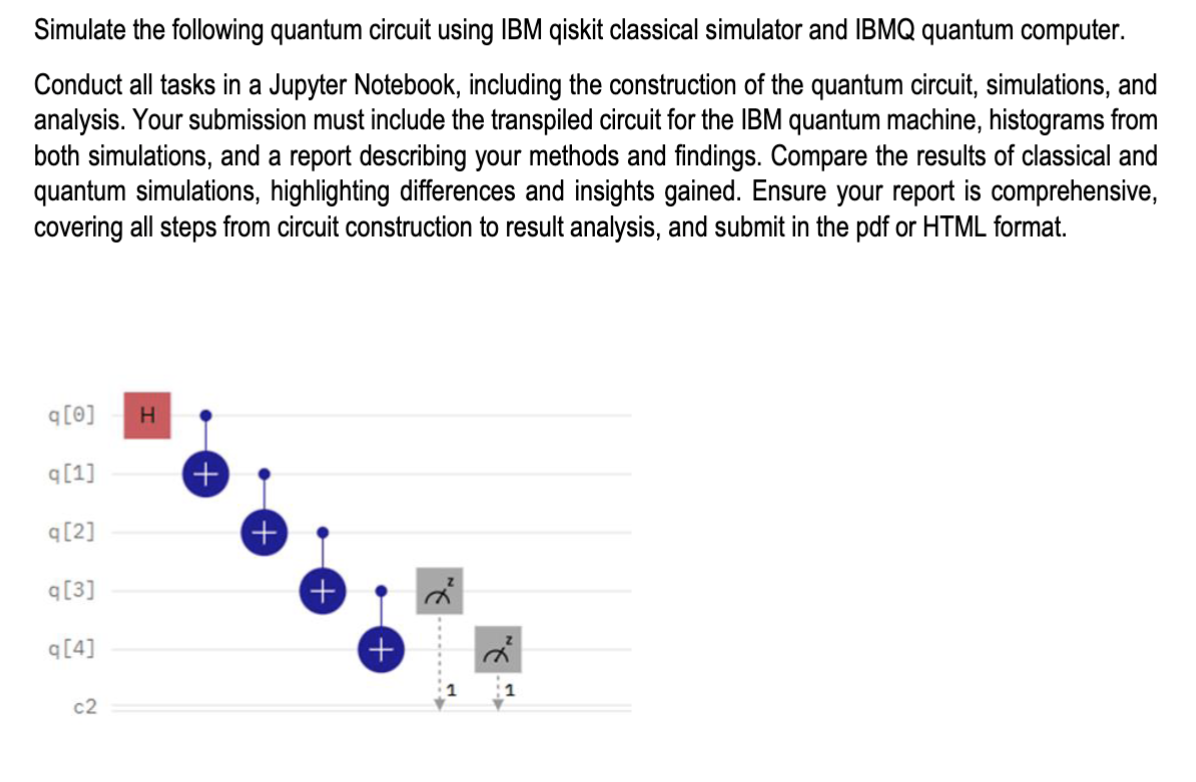

In [8]:
from IPython.display import Image

# Display the image
Image(filename='Lab Work/Question.png')

In [23]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit import transpile, assemble
from qiskit.providers.basicaer import BasicAer

# Create the quantum circuit
circuit = QuantumCircuit(5, 2)

# Apply the gates as described in the task
circuit.h(0)  # Hadamard gate on qubit 0
circuit.cx(0, 1)  # CNOT from qubit 0 to qubit 1
circuit.cx(1, 2)  # CNOT from qubit 1 to qubit 2
circuit.cx(2, 3)  # CNOT from qubit 2 to qubit 3
circuit.cx(3, 4)  # CNOT from qubit 3 to qubit 4

# Simulate the circuit using the statevector simulator to obtain the final state vector
statevector_simulator = BasicAer.get_backend('statevector_simulator')
result = transpile(circuit, statevector_simulator)
statevector = assemble(result)
final_state = statevector_simulator.run(statevector).result().get_statevector()

# Display the final statevector
print(final_state)

# For measurement, we'll create a separate circuit including the measure operations
measurement_circuit = circuit.copy()
measurement_circuit.measure(3, 0)
measurement_circuit.measure(4, 1)

# Transpile the circuit for the BasicAer simulator
transpiled_circuit = transpile(measurement_circuit, BasicAer.get_backend('qasm_simulator'))

# Assemble the transpiled circuit and run it using the qasm simulator
qasm_simulator = BasicAer.get_backend('qasm_simulator')
qobj = assemble(transpiled_circuit, qasm_simulator)
results = qasm_simulator.run(qobj, shots=1024).result()

# Get the measurement results
counts = results.get_counts(measurement_circuit)

# Plot the histogram
plot_histogram(counts)

ModuleNotFoundError: No module named 'qiskit.providers.basicaer'